/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/sta

KeyboardInterrupt: 

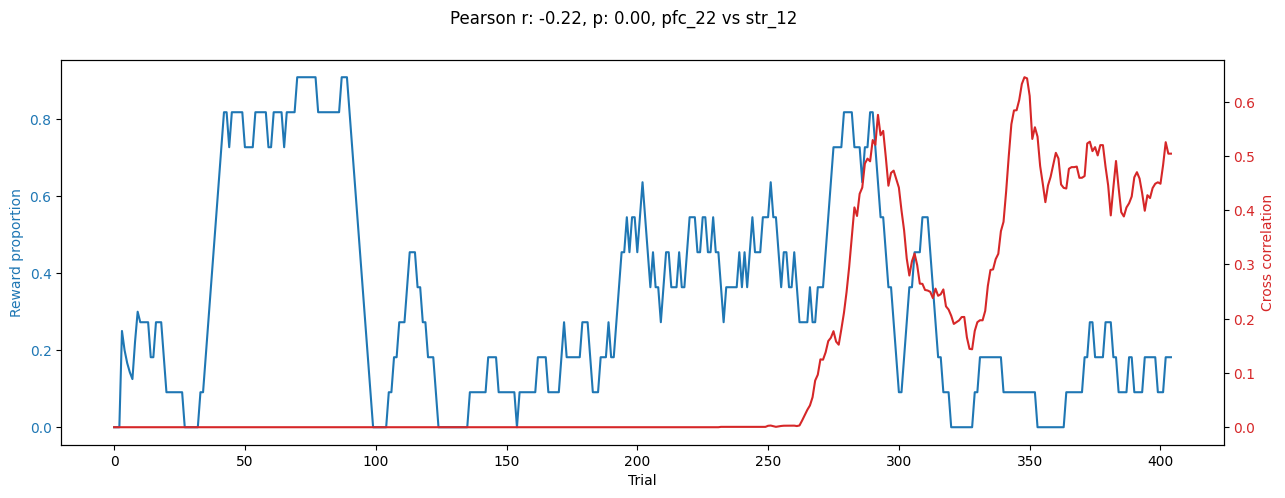

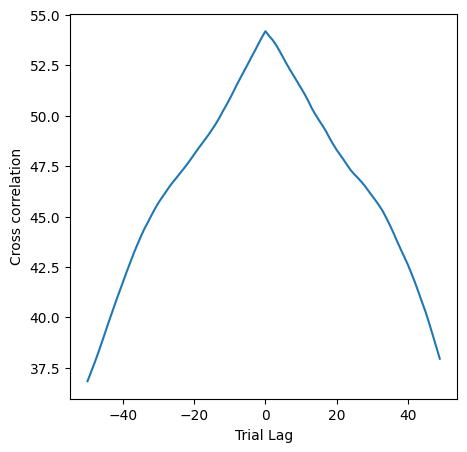

In [2]:
# creating panel C of figure 6
from lib.figure_6 import figure_6_panel_cd
from os.path import join as pjoin
from glob import glob
from lib.file_utils import get_session_names, get_str_pfc

import pandas as pd

# get all the session names
session_names = get_session_names()

# get the pfc and str data
for session_name in session_names:
    session_data_path = pjoin('data', 'behaviour_data', session_name+'.csv')
    session_data = pd.read_csv(session_data_path)
    session_data.fillna(0, inplace=True)
    cue_times = session_data['cue_time'].values
    trial_reward = session_data['trial_reward'].values

    str_times, pfc_times = get_str_pfc(session_name)
    str_cells = list(str_times.keys())
    pfc_cells = list(pfc_times.keys())

    for str_cell in str_cells:
        for pfc_cell in pfc_cells:
            figure_6_panel_cd(str_times=str_times[str_cell], pfc_times=pfc_times[pfc_cell], cue_times=cue_times, rewarded=trial_reward, str_name=str_cell, pfc_name=pfc_cell, session_name=session_name)

In [1]:
# creating panel C of figure 6 using mono pairs
from lib.figure_6 import figure_6_panel_cd, figure_6_panel_ef
from os.path import join as pjoin
from glob import glob
from lib.file_utils import get_session_names, get_str_pfc
from lib.conversion import one_to_zero_cell

import pandas as pd
import numpy as np

# get all mono pairs
mono_pairs = pd.read_csv('mono_pairs.csv')

# plot figure 6 for each pair
for i, row in mono_pairs.iterrows():
    session_name = str(row['mouse']) +  str(row['date'])
    session_data_path = pjoin('data', 'behaviour_data', session_name+'.csv')
    session_data = pd.read_csv(session_data_path)
    session_data.fillna(0, inplace=True)
    cue_times = session_data['cue_time'].values
    trial_reward = session_data['trial_reward'].values

    str_name = row['str_name']
    pfc_name = row['pfc_name']

    # change index from 1 based to 0 based
    str_name = one_to_zero_cell(str_name)
    pfc_name = one_to_zero_cell(pfc_name)

    str_times, pfc_times = np.load(pjoin('data', 'spike_times', session_name, str_name+'.npy')), np.load(pjoin('data', 'spike_times', session_name, pfc_name+'.npy'))
    figure_6_panel_cd(str_times=str_times, pfc_times=pfc_times, cue_times=cue_times, rewarded=trial_reward, str_name=str_name, pfc_name=pfc_name, session_name=session_name, mono=True)
    figure_6_panel_ef(str_times=str_times, pfc_times=pfc_times, cue_times=cue_times, rewarded=trial_reward, str_name=str_name, pfc_name=pfc_name, session_name=session_name, mono=True)

/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/peiheng/PSRP_RPD/.conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
